In [36]:
import numpy as np
import pandas as pd
import random

from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import chi2_contingency
import seaborn as sns
# from seaborn import pairplot
# from seaborn import distplot
# from seaborn import boxplot

# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [2]:
df_data = pd.read_csv('orange_small_churn_data.train')
df_labels = pd.read_csv('orange_small_churn_labels.train', names=['Label'], header=None)

In [3]:
df_data['Label'] = df_labels.Label
df_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Label
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In [96]:
# ser_descr = df_data.describe()
# ser_descr.count.plot()
df_data.iloc[:,189]

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19       24696.54
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
           ...   
39970         NaN
39971         NaN
39972         NaN
39973         NaN
39974         NaN
39975         NaN
39976         NaN
39977         NaN
39978         NaN
39979         NaN
39980         NaN
39981         NaN
39982         NaN
39983         NaN
39984         NaN
39985         NaN
39986         NaN
39987         NaN
39988         NaN
39989         NaN
39990         NaN
39991         NaN
39992         NaN
39993         NaN
39994     

In [5]:
# ser_descr.pivot_table()
# ser_descr.

2\. Рассчитайте доли классов `отток` и `не отток`.

In [6]:
dinfo = {-1: 'не отток', 1: 'отток'}
for i, v in  (df_labels['Label'].value_counts() / df_labels.shape[0]).items():
    print('Доля класса {:<8}: {:.3f}'.format(dinfo[i], v))

Доля класса не отток: 0.926
Доля класса отток   : 0.074


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

Заметки. Материалы для подготовки  
[Коэффициент корреляции Крамера V для категориальных переменных](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)   
[Pandas crosstab](https://pbpython.com/pandas-crosstab.html)

In [7]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

Окончание заметок

#### Из материалов лекции:
Для пар признаков, один из которых непрерывный, а другой — категориальный, вообще не
нужно считать никакой коэффициент корреляции.
Мерой силы взаимосвязи между X1 и X2 может служить просто разность этих математических ожиданий:  
E (X1 | X2 = 1) − E (X1 | X2 = 0)  
Эта величина не нормированная, она может меняться в любом диапазоне, от −∞ до +∞. Однако её гораздо легче интерпретировать, чем коэффициент корреляции, который можно вычислить на такой паре выборок.

In [8]:
# df_data[df_data.Label == 1][:190,:].mean()
# отбросим столбцы, в которых все значения NaN
df_tmp = df_data.iloc[:, list(range(0, 190)) + [-1]].dropna(axis=1, how='all')
df_tmp.info()
ser_desc=df_tmp.describe().transpose().drop('Label')
ser_desc = ser_desc[(ser_desc['min'] == ser_desc['25%']) & (ser_desc['25%'] == ser_desc['50%']) 
         & (ser_desc['25%'] == ser_desc['75%']) ]
ser_desc.info()
ser_desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 175 entries, Var1 to Label
dtypes: float64(173), int64(2)
memory usage: 53.4 MB
<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Var2 to Var181
Data columns (total 8 columns):
count    46 non-null float64
mean     46 non-null float64
std      46 non-null float64
min      46 non-null float64
25%      46 non-null float64
50%      46 non-null float64
75%      46 non-null float64
max      46 non-null float64
dtypes: float64(8)
memory usage: 3.2+ KB


,count,mean,std,min,25%,50%,75%,max
Var2,1006.0,4.970179e-03,1.576417e-01,0.0,0.0,0.0,0.0,5.0
Var3,1005.0,4.293284e+02,4.470406e+03,0.0,0.0,0.0,0.0,130668.0
Var4,1275.0,1.482353e-01,1.396054e+00,0.0,0.0,0.0,0.0,27.0
Var11,1005.0,8.549254e+00,2.528092e+00,8.0,8.0,8.0,8.0,32.0
Var14,1005.0,6.945274e-01,3.364808e+00,0.0,0.0,0.0,0.0,34.0
Var18,1275.0,6.517647e+00,2.594866e+01,0.0,0.0,0.0,0.0,480.0
Var19,1275.0,2.470588e-01,1.634877e+00,0.0,0.0,0.0,0.0,27.0
Var26,1165.0,6.952790e-02,5.303246e-01,0.0,0.0,0.0,0.0,9.0
Var27,1165.0,2.575107e-02,2.255719e-01,0.0,0.0,0.0,0.0,2.0
Var29,570.0,1.754386e-02,1.866576e-01,0.0,0.0,0.0,0.0,2.0


In [31]:
# Расчет корреляции между переменными и целевой функцией
ser_cor_cont = df_tmp[df_tmp.Label == 1].mean() -  df_tmp[df_tmp.Label == -1].mean()
# (df_tmp.isna().sum()/df_tmp.shape[0]).hist(bins=5);

In [32]:
ser_sort = ser_cor_cont.abs().sort_values(ascending = False)
ser_sort.head(5)
# Посмотрим, сколько "не хороших" (по критерию равентства min, 25%, 75%) парметрров в top
set(ser_sort.head(20).index.tolist()).intersection(set(ser_desc.index.tolist()))

{'Var124', 'Var131'}

In [8]:
# plt.hist(ser_sort.values, bins=50)

# plt.xscale('log')

Что делать с категориальными переменными, у которых одна категория?  
Первый вариант - не учитывать их совсем и второй вариант - заменить NaN строкой 'NaN'
и пусть будет второй категорией. Вполне возможно, что эта переменная имеет единствен-
ное категориальное значение "очень тесно" связанное с целевым значением.  
Кстати, возможно что надо учитывать такую возможность и для остальных категориальных
переменных, а не просто отбрасывать их.  
Может быть имеет смысл вычислять корреляцию для обоих вариантов, и брать наибольшую?  
Эта мысль и реализована ниже.  
Как видно из распечатки ниже, где-то значения равны, где-то различаются в одну или 
другую сторону, кое-где раздичаются более чем в 2 раза (Var218).  
[О том, как по умолчанию обрабатывается NaN](#NaN_crosstab)
<a id='NaN_crosstab_return'></a>

In [115]:
df_cat_cor = pd.DataFrame(0.0,  columns=['Corr'], index=['Var{}'.format(i) for i in  range(191, 230)])
lonecat = []
# Увеличение величины до 231 приводит к расчету для Label
for col in range(190, 230):
    ser = df_data.iloc[:, col]
    if not ser.isnull().all():
        c_v_0 = 0.00
        if np.sum(~pd.isnull(ser.unique())) > 1:
            c_v_0 = cramers_v( ser, df_data.Label)
        else:
            lonecat.append(df_data.columns[col])
        c_v_1 = cramers_v( ser.replace(np.NaN, "NaN"), df_data.Label)
        
        df_cat_cor.loc[df_data.columns[col], 'Corr'] = c_v_0
        info = '=' if round(c_v_0, 3) == round(c_v_1, 3) else '-' if c_v_1 < c_v_0 else '+'
        print('{0} {3:.3f} {4} (-NaN:{1:.3f} +NaN:{2:.3f}) {5}'.format(
            df_data.columns[col], c_v_0, c_v_1, max(c_v_0, c_v_1), info, 
            '{:.3f}'.format(max(c_v_0, c_v_1)/min(c_v_0, c_v_1)) if min(c_v_0, c_v_1) > 0. and info != '=' else ''
        ))
print('Категориальные переменные с одной категорией. ', lonecat)

Var191 0.013 + (-NaN:0.000 +NaN:0.013) 
Var192 0.118 + (-NaN:0.116 +NaN:0.118) 1.019
Var193 0.061 = (-NaN:0.061 +NaN:0.061) 
Var194 0.017 + (-NaN:0.010 +NaN:0.017) 1.758
Var195 0.021 = (-NaN:0.021 +NaN:0.021) 
Var196 0.009 = (-NaN:0.009 +NaN:0.009) 
Var197 0.035 = (-NaN:0.035 +NaN:0.035) 
Var198 0.000 = (-NaN:0.000 +NaN:0.000) 
Var199 0.237 = (-NaN:0.237 +NaN:0.237) 
Var200 0.043 - (-NaN:0.043 +NaN:0.000) 
Var201 0.017 + (-NaN:0.000 +NaN:0.017) 
Var202 0.000 = (-NaN:0.000 +NaN:0.000) 
Var203 0.009 + (-NaN:0.007 +NaN:0.009) 1.229
Var204 0.048 = (-NaN:0.048 +NaN:0.048) 
Var205 0.073 - (-NaN:0.073 +NaN:0.072) 1.020
Var206 0.082 + (-NaN:0.077 +NaN:0.082) 1.058
Var207 0.055 = (-NaN:0.055 +NaN:0.055) 
Var208 0.010 + (-NaN:0.008 +NaN:0.010) 1.214
Var210 0.047 = (-NaN:0.047 +NaN:0.047) 
Var211 0.032 = (-NaN:0.032 +NaN:0.032) 
Var212 0.075 = (-NaN:0.075 +NaN:0.075) 
Var213 0.015 + (-NaN:0.000 +NaN:0.015) 
Var214 0.043 - (-NaN:0.043 +NaN:0.000) 
Var215 0.001 + (-NaN:0.000 +NaN:0.001) 
Var216 0.0

In [116]:
df_cat_cor.sort_values(by= 'Corr', inplace=True, ascending = False)
df_cat_cor

,Corr
Var199,0.237375
Var192,0.116264
Var216,0.083442
Var206,0.077436
Var212,0.075150
Var205,0.073484
Var228,0.070617
Var193,0.060861
Var207,0.055418
Var227,0.054255


In [12]:
print('Категориальные переменные с одной категорией. ', lonecat)

Категориальные переменные с одной категорией.  ['Var191', 'Var213', 'Var215', 'Var224']


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

https://habr.com/ru/company/ods/blog/323210/

https://habr.com/ru/company/ods/blog/322534/

https://medium.com/nuances-of-programming/5-%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%8B%D1%85-%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BE%D0%B2-%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85-%D0%BD%D0%B0-python-%D1%81-%D0%BA%D0%BE%D0%B4%D0%BE%D0%BC-e0053808c83d


Распределения в разрезе классов - может быть это по оси X - -1, 1, по оси Y - значение переменной

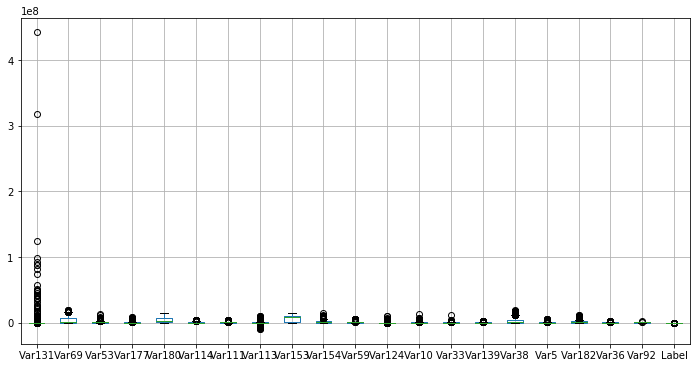

In [13]:
df4 = df_data[ser_sort.head(20).index.tolist() + ['Label']]
df4.boxplot( figsize=(12,6) )

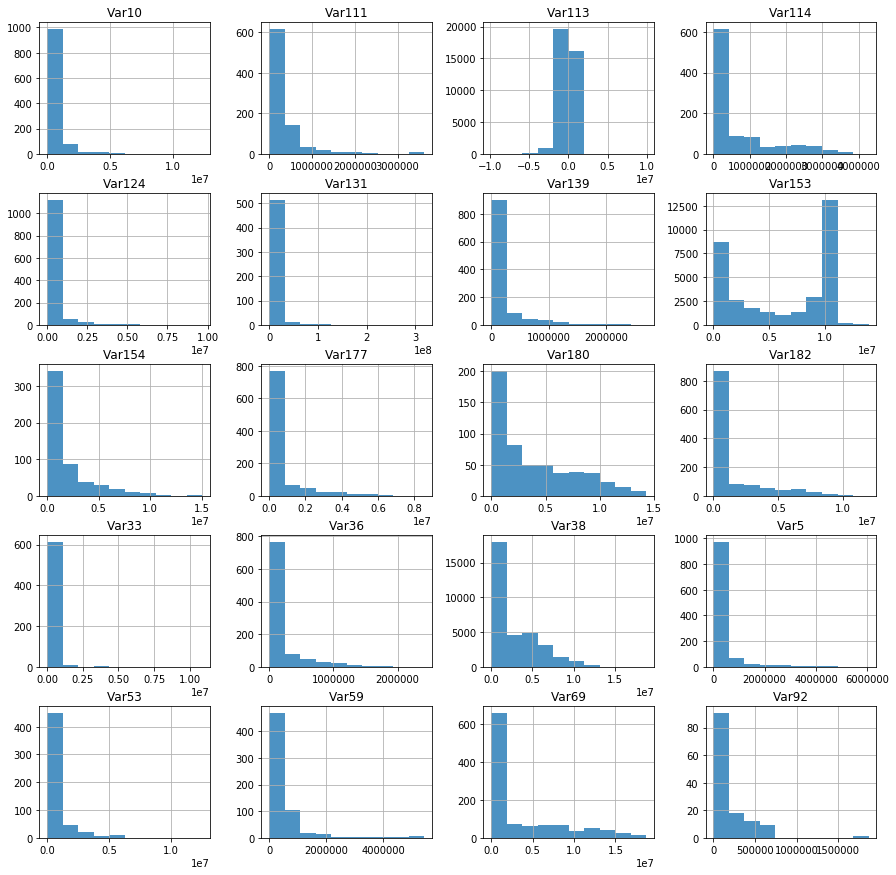

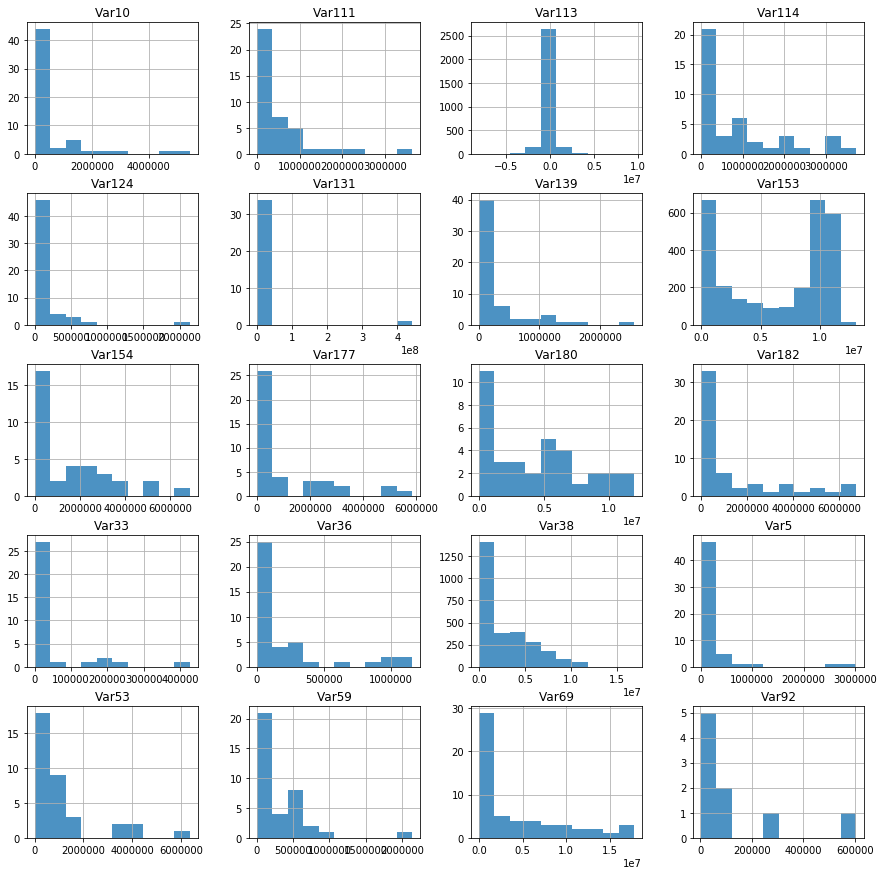

In [14]:
# df4.hist(figsize=(12,6));
df4.groupby('Label').hist(alpha=0.8, figsize=(15,15));

C:\ProgramData\Anaconda2\envs\newpy\lib\site-packages\pandas\plotting\_core.py:2254: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return_type=return_type, **kwds)


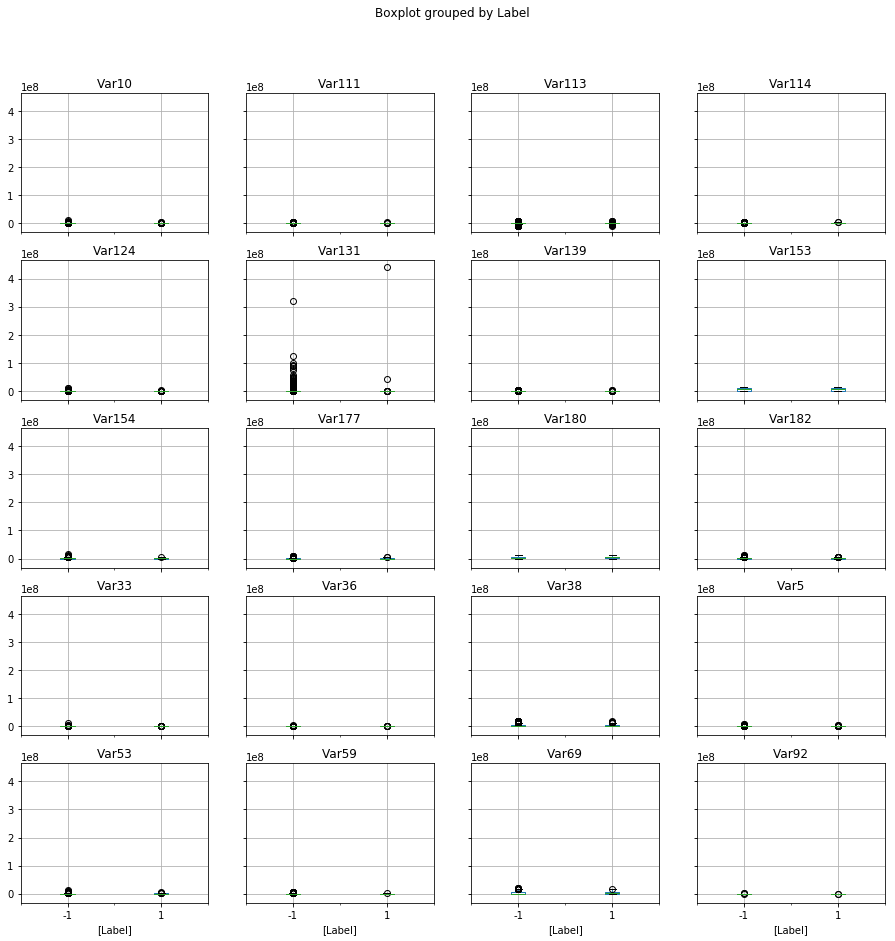

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
# df4.groupby('Label').plot.hist(alpha=0.4, ax=ax);
df4.boxplot(by='Label', ax=ax)
ax.margins(y=0)

In [16]:
# ser_sort.head(1).index.tolist()
df4.head()
# df4.Var131.dropna()

,Var131,Var69,Var53,Var177,Var180,Var114,Var111,Var113,Var153,Var154,...,Var124,Var10,Var33,Var139,Var38,Var5,Var182,Var36,Var92,Label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1209960.0,2313888.0,NaN,...,NaN,NaN,NaN,NaN,82752.0,NaN,NaN,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417932.0,6502680.0,NaN,...,NaN,NaN,NaN,NaN,2706120.0,NaN,NaN,NaN,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-124655.2,10569040.0,NaN,...,NaN,NaN,NaN,NaN,4698780.0,NaN,NaN,NaN,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378473.6,9676200.0,NaN,...,NaN,NaN,NaN,NaN,864384.0,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142602.4,10535200.0,NaN,...,NaN,NaN,NaN,NaN,4364880.0,NaN,NaN,NaN,NaN,-1


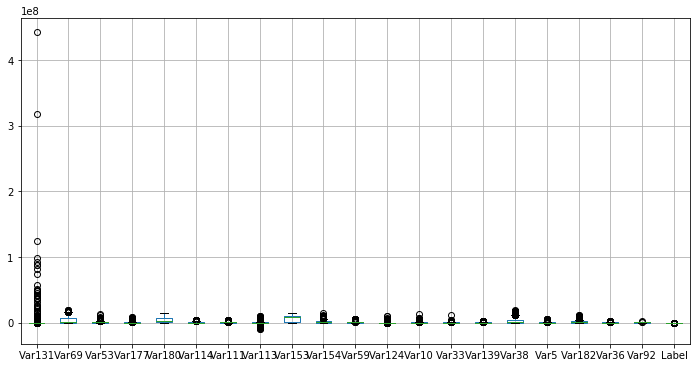

In [17]:
# distplot(df4.Var131.dropna())

# fig, ax = plt.subplots(figsize=(8,6))
# df4.groupby('Label').Var131.hist(ax=ax, bins=50)
# ax.set_yscale('log')
# plt.show()
# boxplot(df4[[df4.Label==1]].Var131)
# boxplot([df4[df4.Label==1].Var69, df4[df4.Label==-1].Var69], orient="h")
df4.boxplot( figsize=(12,6) )

C:\ProgramData\Anaconda2\envs\newpy\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda2\envs\newpy\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda2\envs\newpy\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda2\envs\newpy\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


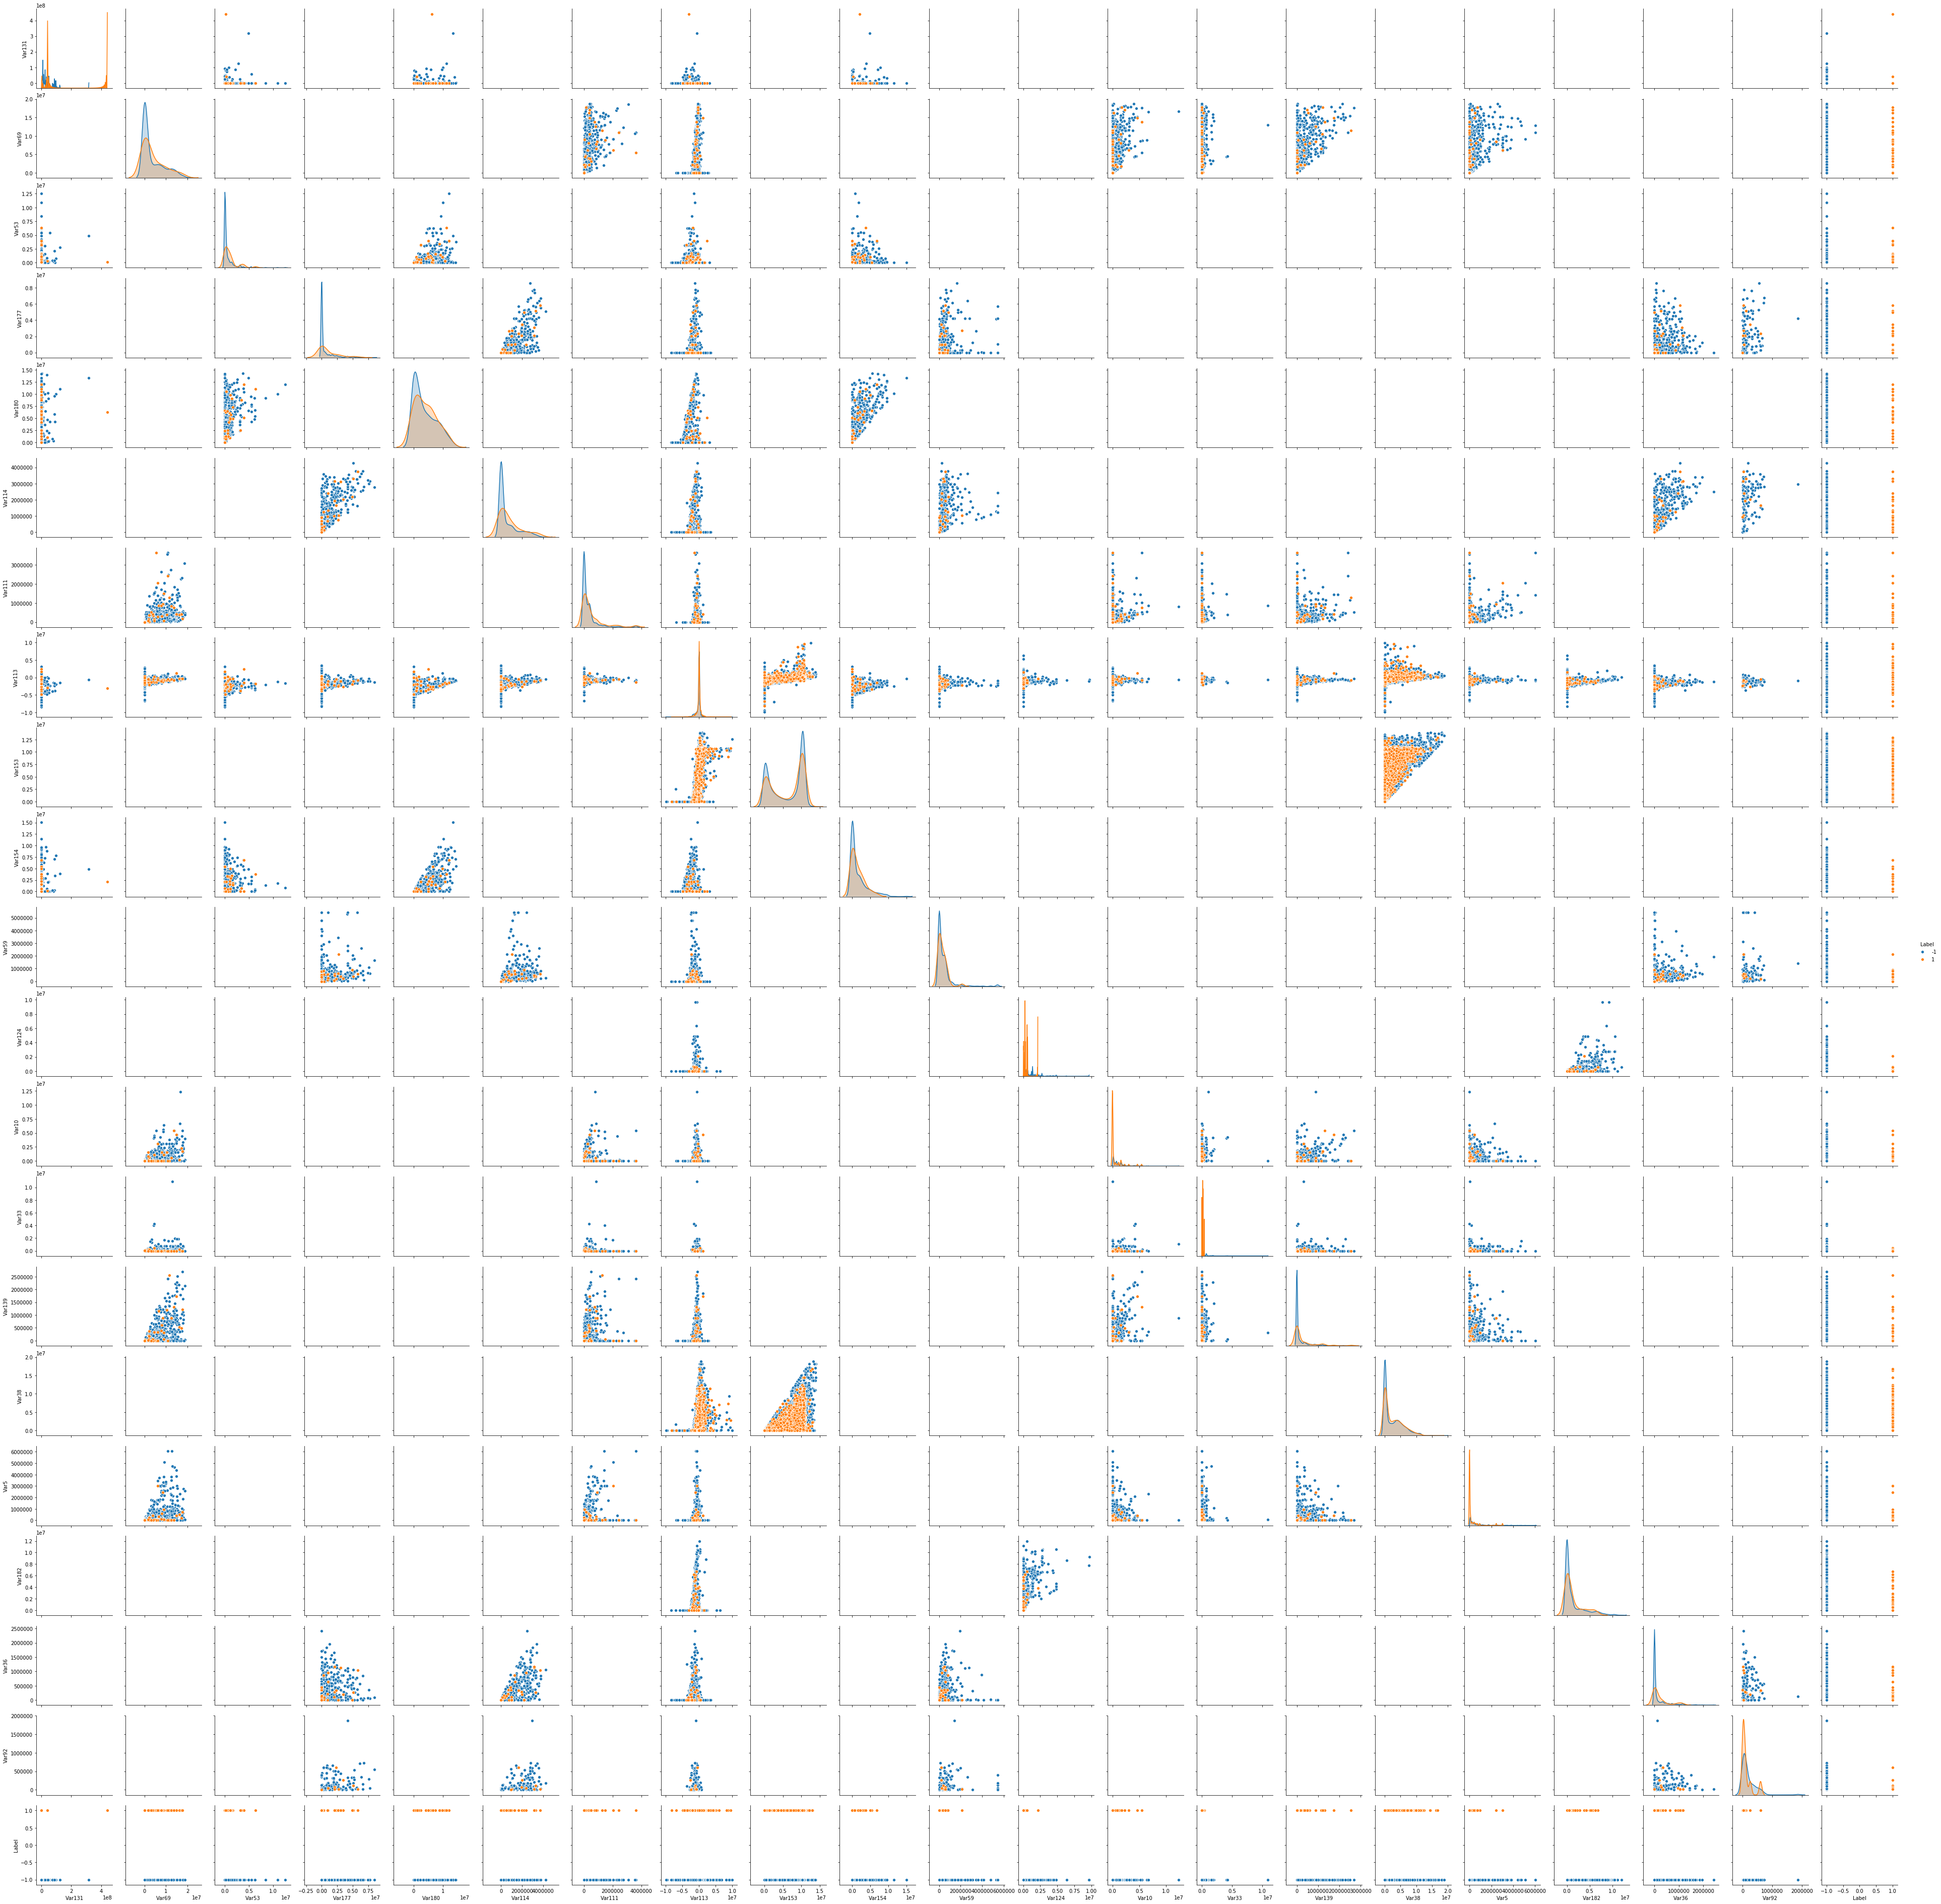

In [51]:
pairplot(df4, hue='Label')

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

Случайная выборка из диапазона 0-190, за исключением N переменных, выбранных в предшествующем пункте

In [36]:
# df_tmp.dropna(axis=1, how='all')

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,Label
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,276.0,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,22.0,NaN,174.0,NaN,-1
6,NaN,NaN,NaN,NaN,NaN,889.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
7,NaN,NaN,NaN,NaN,NaN,161.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,-1
8,NaN,NaN,NaN,NaN,NaN,420.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
9,NaN,NaN,NaN,NaN,NaN,1155.0,0.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [18]:
column_5 = random.sample( [x for x in df_tmp.columns[:-1].tolist() if x not in df4.columns.tolist()], 10)
df5 = df_data[column_5 + ['Label']]

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 175 entries, Var1 to Label
dtypes: float64(173), int64(2)
memory usage: 53.4 MB


In [20]:
# df5.head()
df5.describe()

,Var161,Var29,Var116,Var88,Var186,Var70,Var155,Var106,Var23,Var151,Label
count,1275.000000,570.000000,570.000000,871.000000,570.000000,1.165000e+03,1275.000000,1.275000e+03,1165.000000,660.000000,40000.000000
mean,3.515294,0.017544,0.073684,64.988519,3.515789,4.058933e+05,0.800000,3.891890e+04,7.188841,10.375758,-0.851200
std,8.615566,0.186658,0.464760,227.526808,9.412473,8.301321e+05,3.086152,1.626888e+05,48.957504,50.628865,0.524848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-1.000000
75%,0.000000,0.000000,0.000000,70.000000,6.000000,3.773100e+05,0.000000,0.000000e+00,5.000000,8.000000,-1.000000
max,81.000000,2.000000,3.000000,5105.000000,102.000000,6.189690e+06,35.000000,2.274345e+06,1555.000000,1200.000000,1.000000


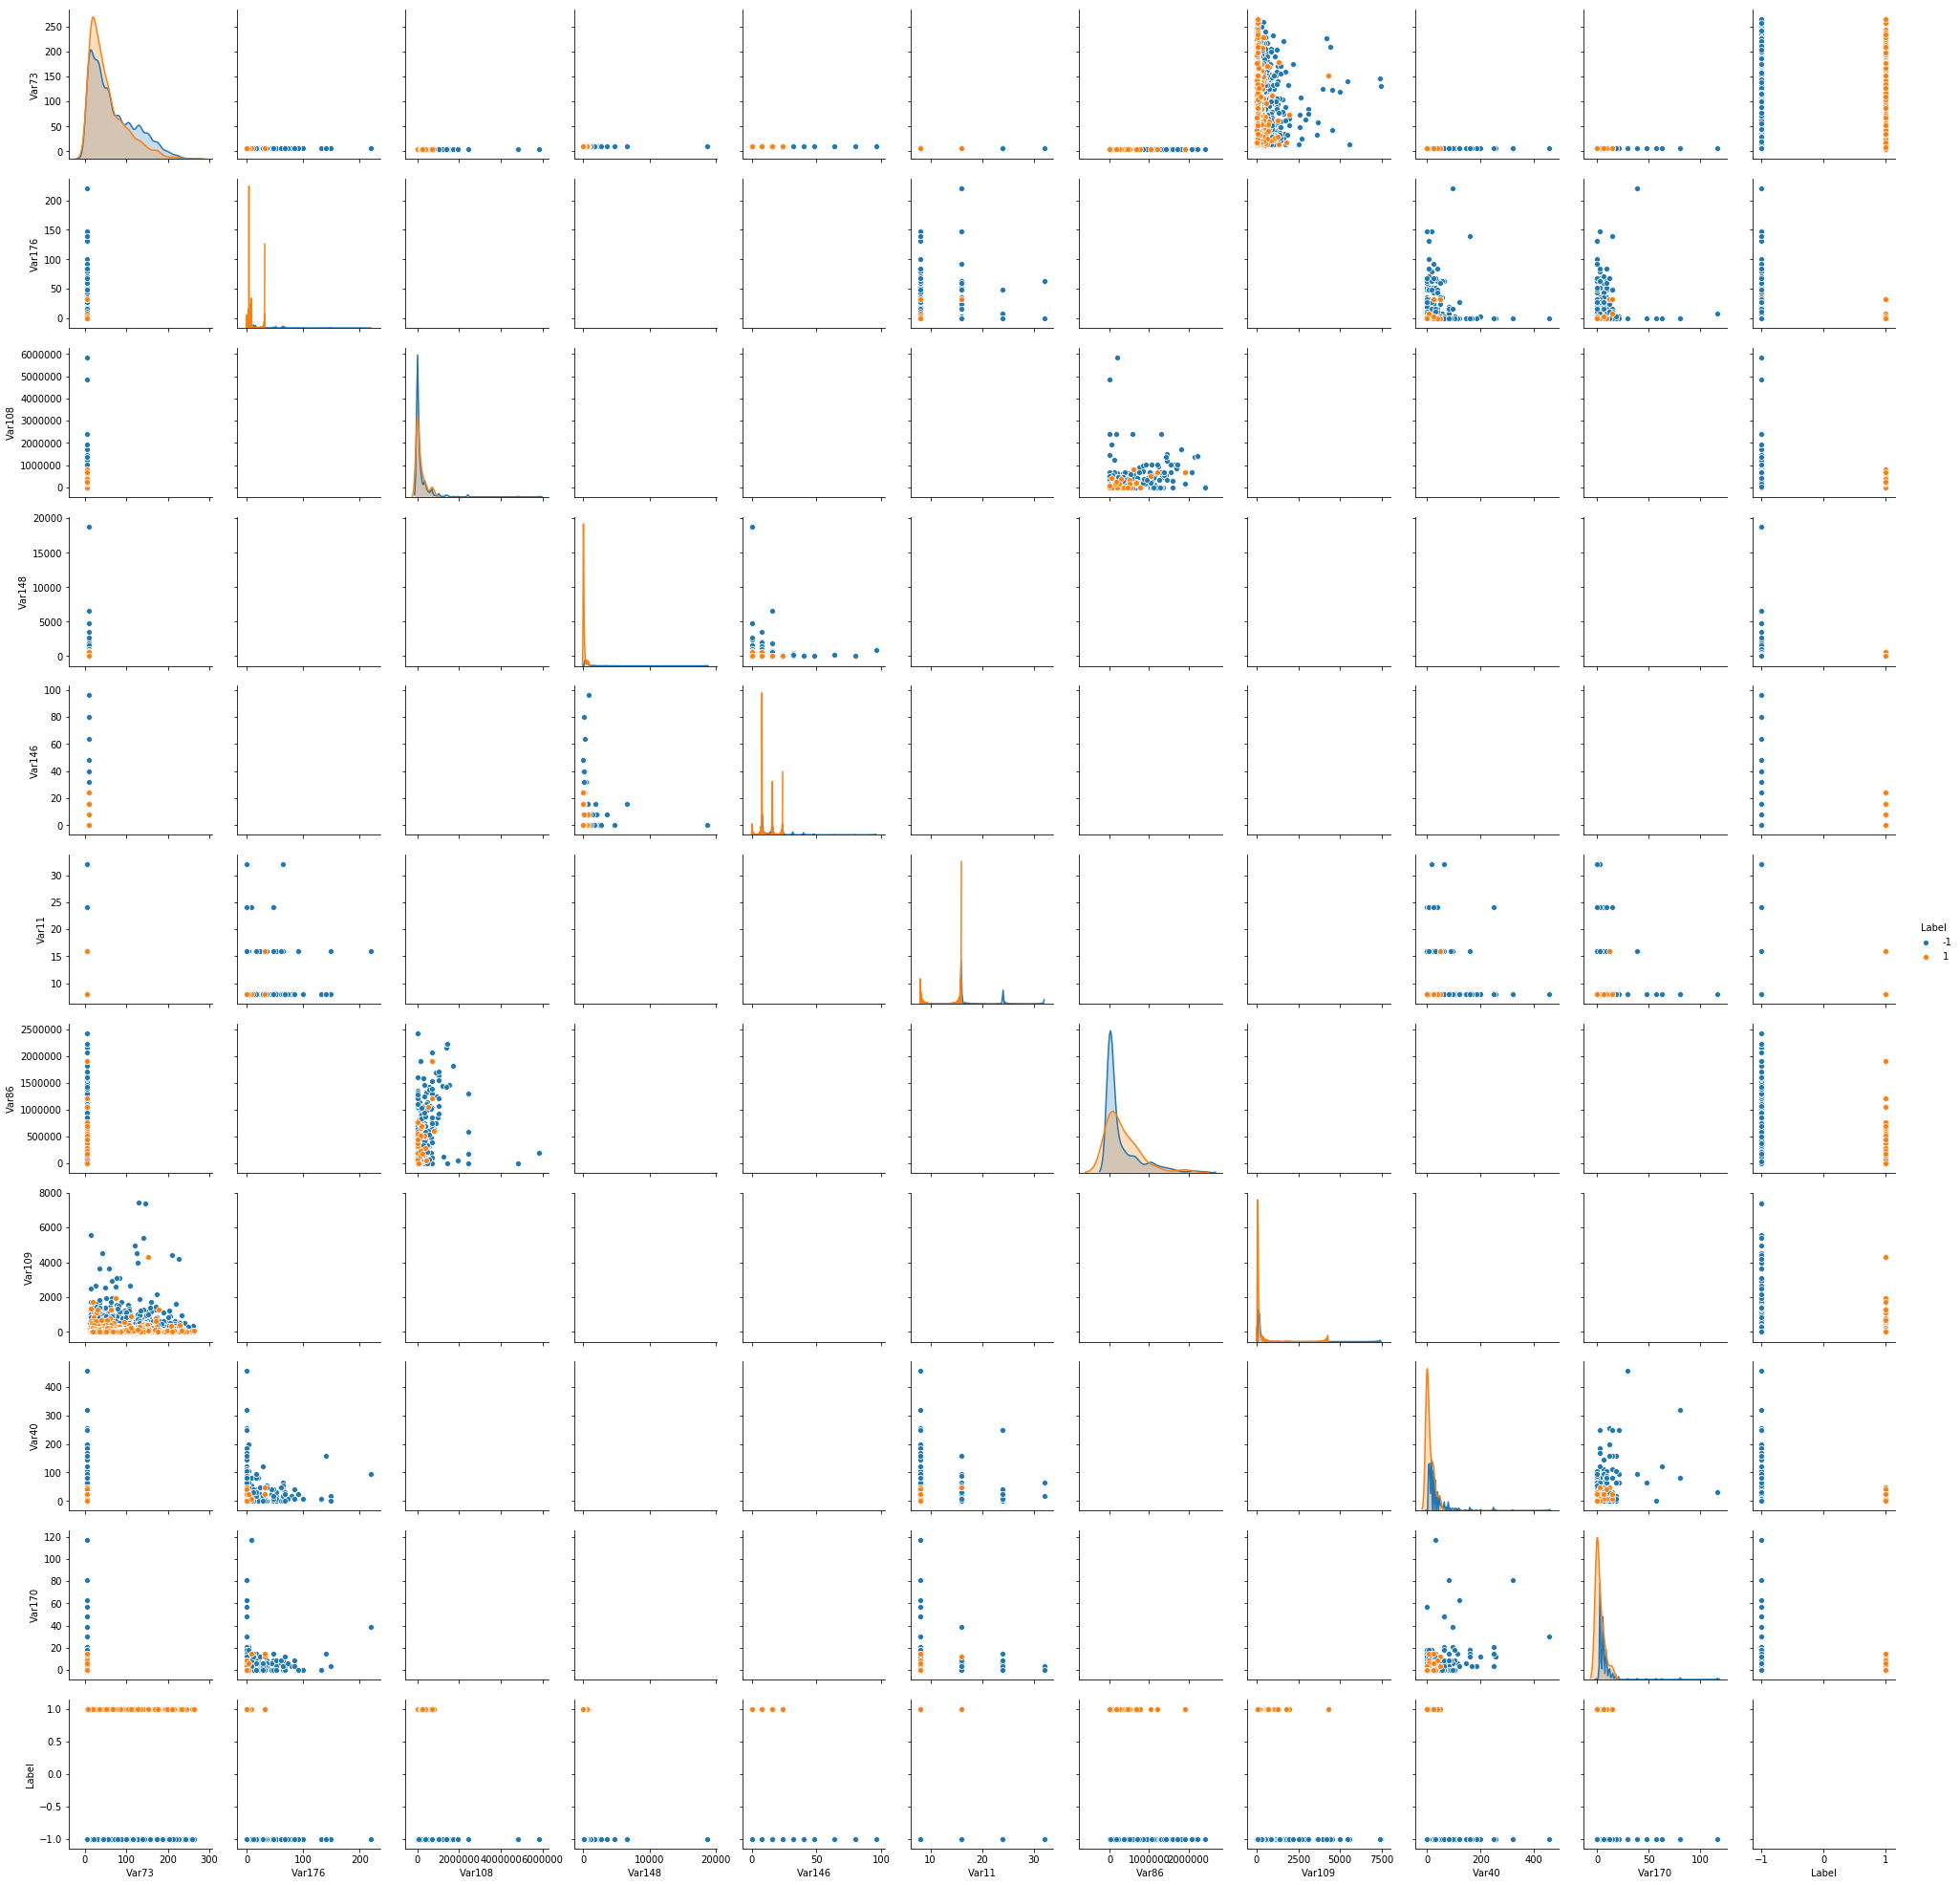

In [44]:
pairplot(df5, hue='Label');

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [21]:
# ser_sort.tail(10).describe()
ser_sort.tail(10)

Var181    0.020968
Var29     0.018692
Var26     0.016762
Var4      0.016095
Var116    0.012817
Var2      0.005181
Var173    0.005087
Var44     0.003251
Var138    0.001639
Var118    0.000000
dtype: float64

In [22]:
df6 = df_data[ser_sort.tail(10).index.tolist() + ['Label']]
df6.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var181,35984.0,0.610633,2.492228,0.0,0.0,0.0,0.0,49.0
Var29,570.0,0.017544,0.186658,0.0,0.0,0.0,0.0,2.0
Var26,1165.0,0.069528,0.530325,0.0,0.0,0.0,0.0,9.0
Var4,1275.0,0.148235,1.396054,0.0,0.0,0.0,0.0,27.0
Var116,570.0,0.073684,0.464760,0.0,0.0,0.0,0.0,3.0
Var2,1006.0,0.004970,0.157642,0.0,0.0,0.0,0.0,5.0
Var173,35984.0,0.006781,0.132355,0.0,0.0,0.0,0.0,6.0
Var44,35984.0,0.167574,1.659588,0.0,0.0,0.0,0.0,135.0
Var138,1275.0,0.001569,0.056011,0.0,0.0,0.0,0.0,2.0
Var118,140.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


In [80]:
ser_desc=df6.describe().transpose().drop('Label')
ser_desc[(ser_desc['min'] == ser_desc['25%']) & (ser_desc['25%'] == ser_desc['50%']) 
         & (ser_desc['25%'] == ser_desc['75%']) ]

,count,mean,std,min,25%,50%,75%,max
Var181,35984.0,0.610633,2.492228,0.0,0.0,0.0,0.0,49.0
Var29,570.0,0.017544,0.186658,0.0,0.0,0.0,0.0,2.0
Var26,1165.0,0.069528,0.530325,0.0,0.0,0.0,0.0,9.0
Var4,1275.0,0.148235,1.396054,0.0,0.0,0.0,0.0,27.0
Var116,570.0,0.073684,0.464760,0.0,0.0,0.0,0.0,3.0
Var2,1006.0,0.004970,0.157642,0.0,0.0,0.0,0.0,5.0
Var173,35984.0,0.006781,0.132355,0.0,0.0,0.0,0.0,6.0
Var44,35984.0,0.167574,1.659588,0.0,0.0,0.0,0.0,135.0
Var138,1275.0,0.001569,0.056011,0.0,0.0,0.0,0.0,2.0
Var118,140.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


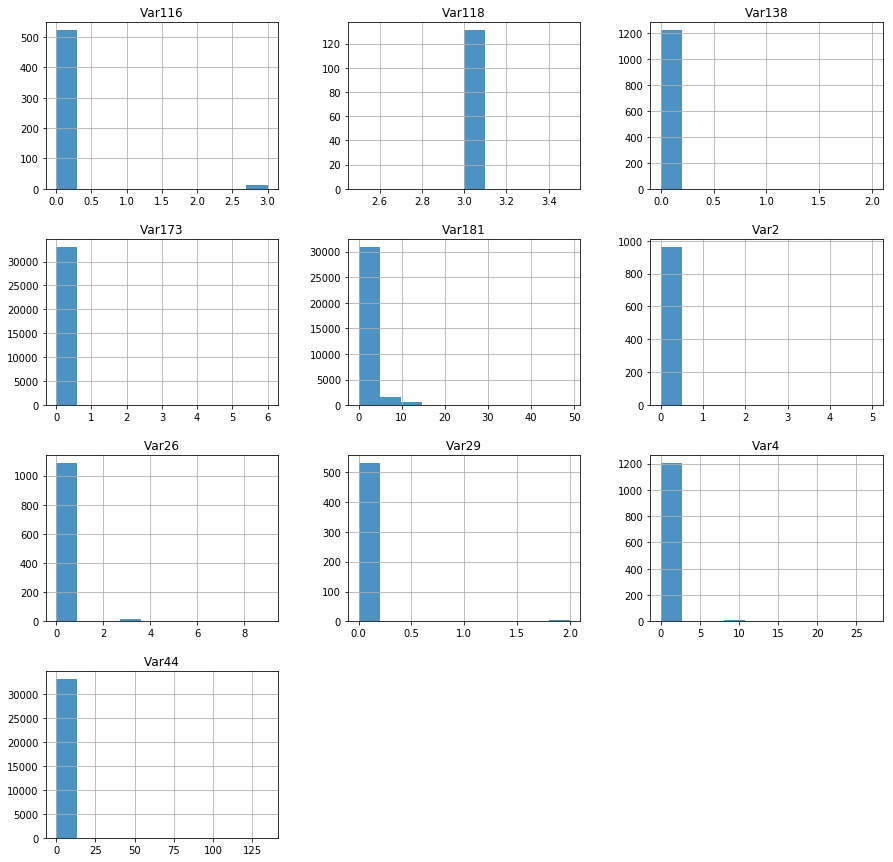

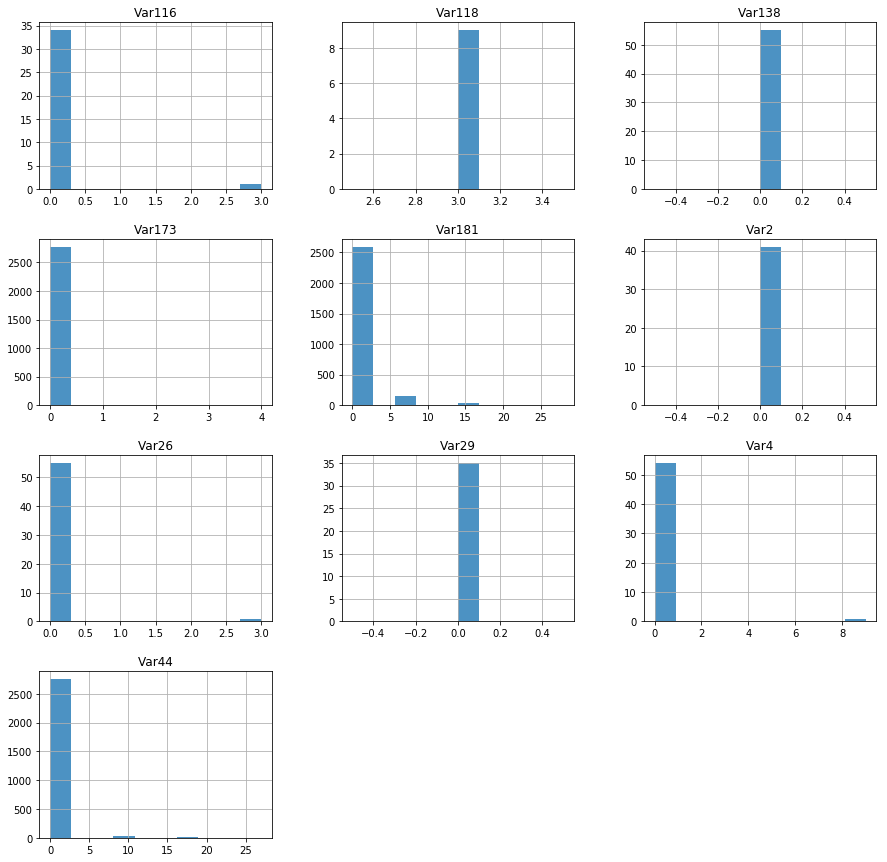

In [57]:

df6.groupby('Label').hist(alpha=0.8, figsize=(15,15));

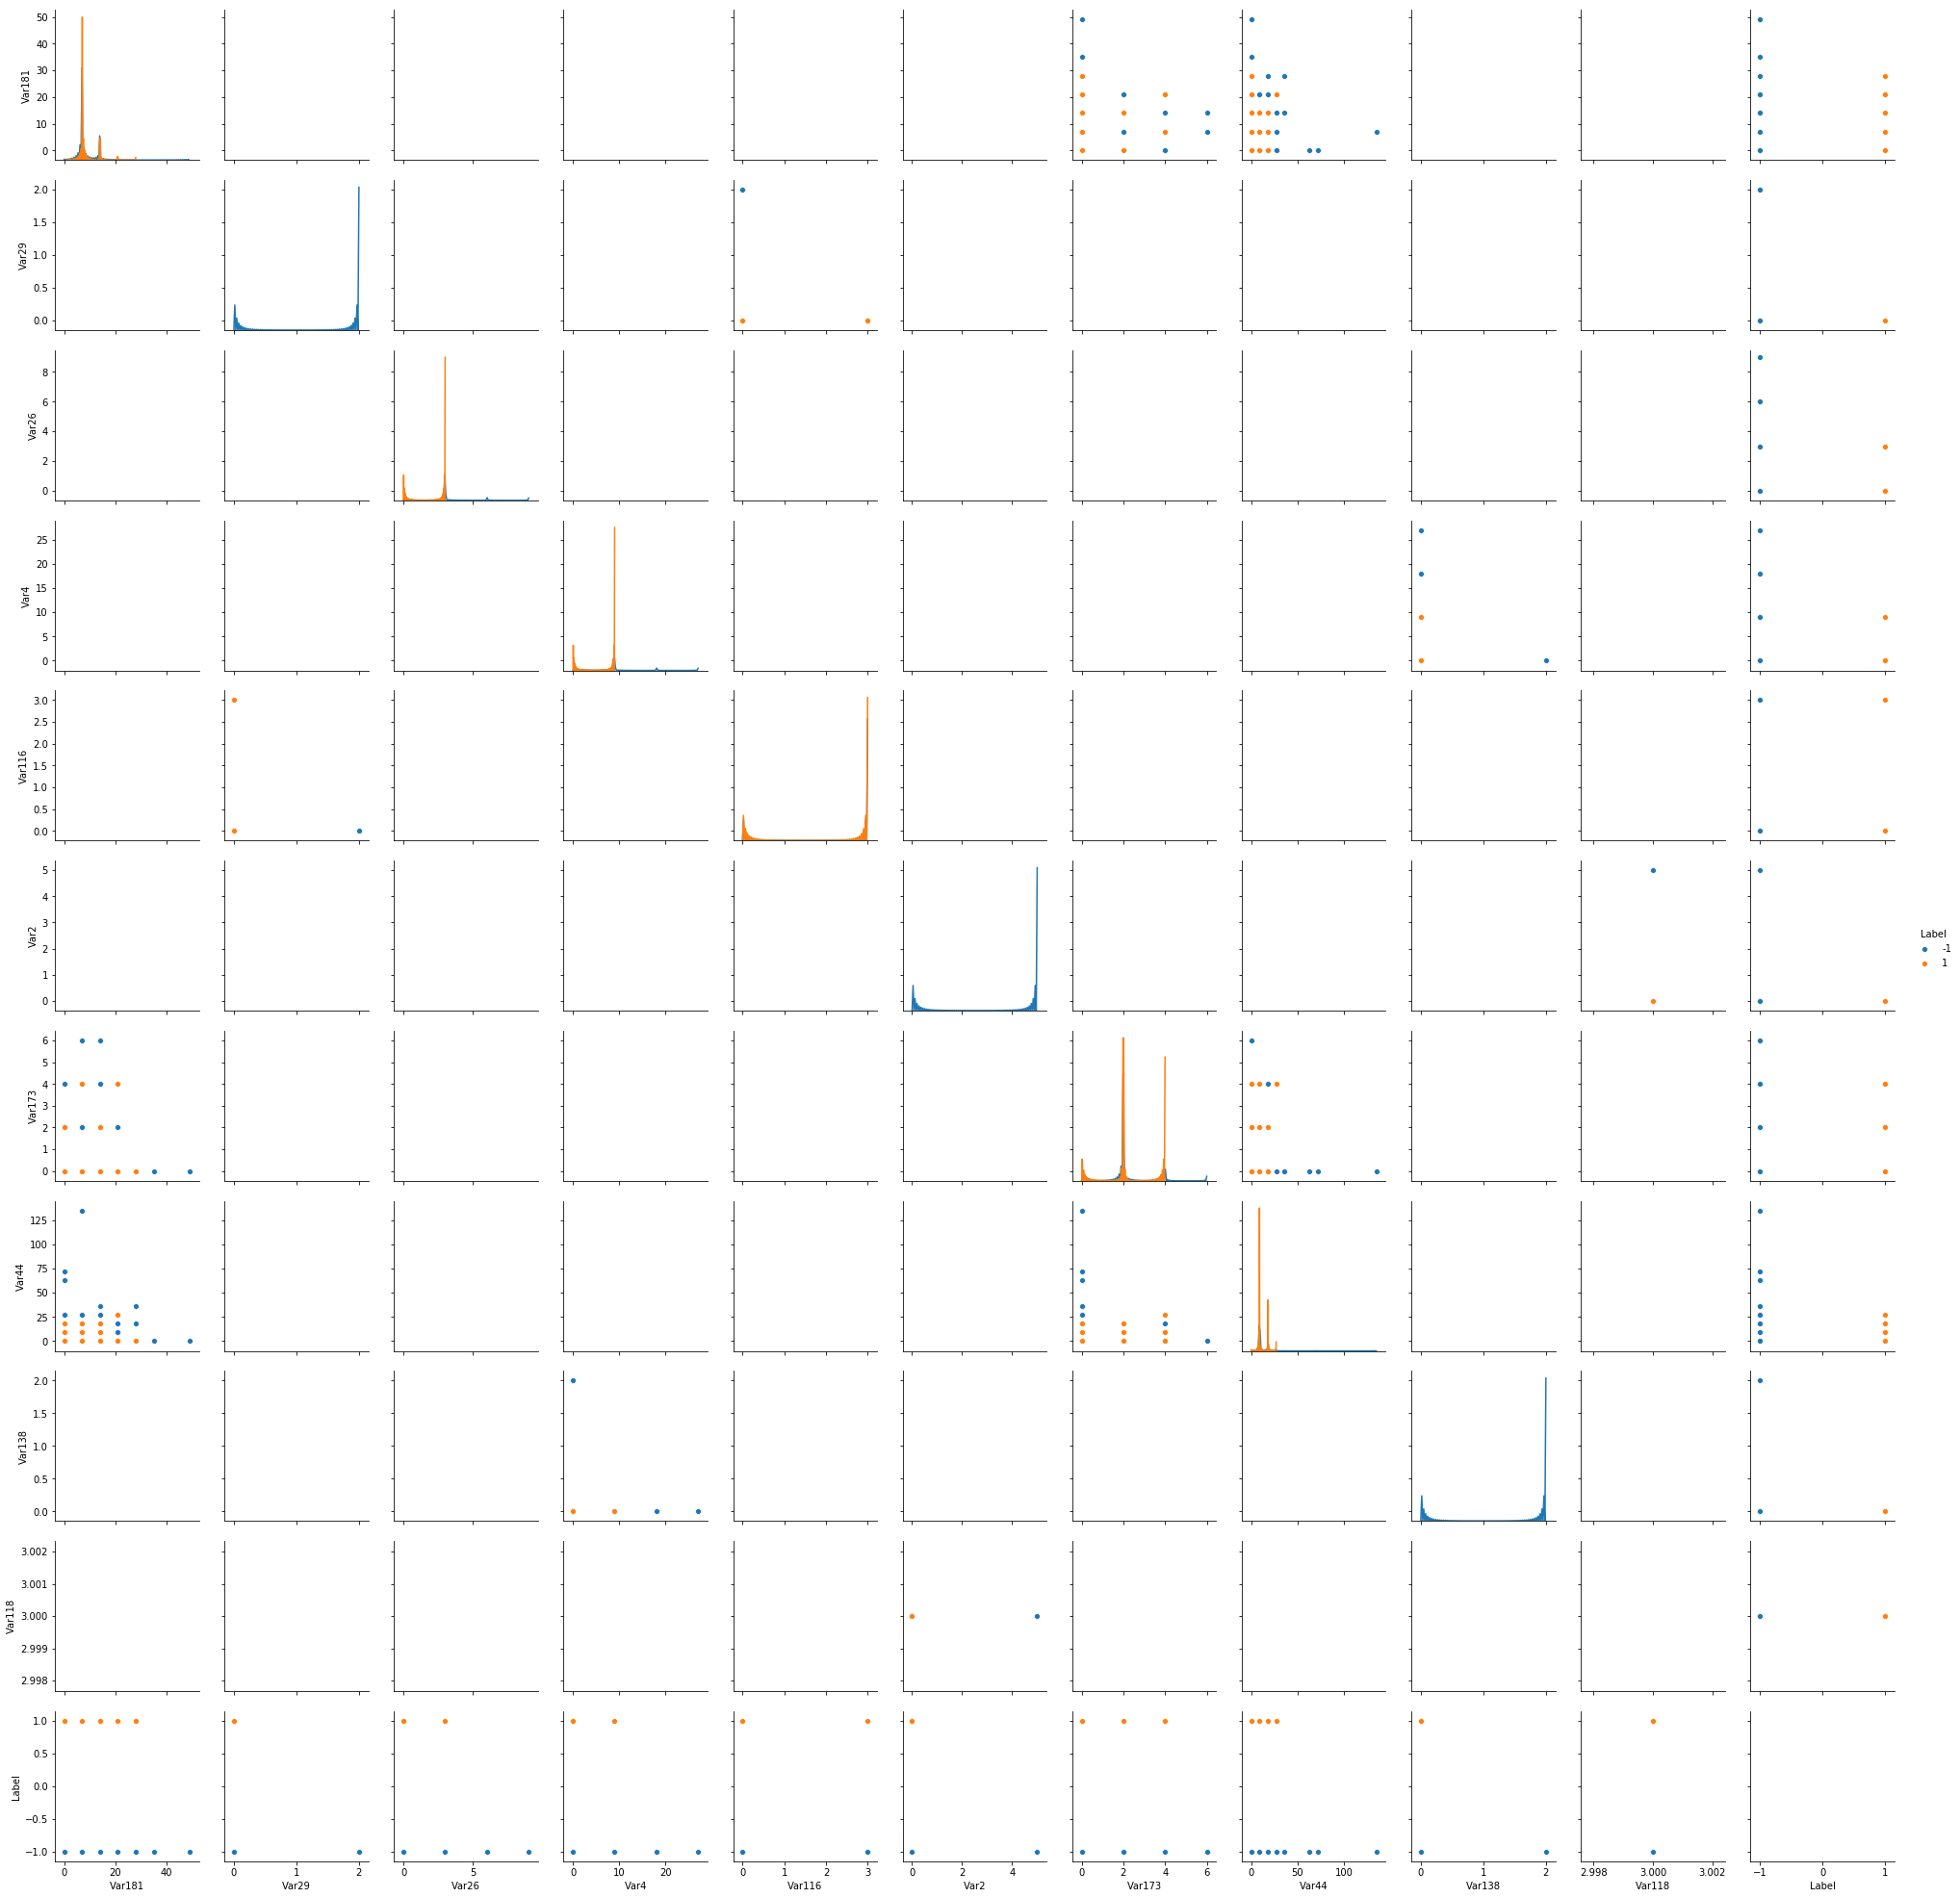

In [59]:
pairplot(df6, hue='Label');

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

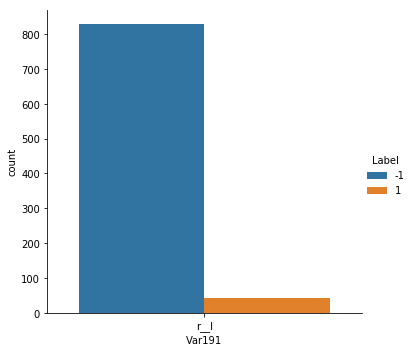

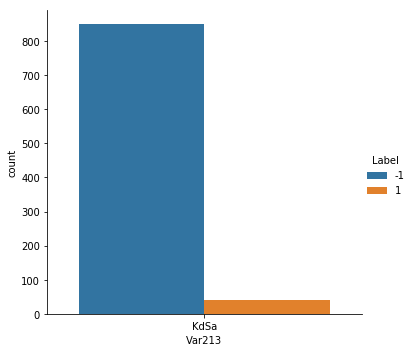

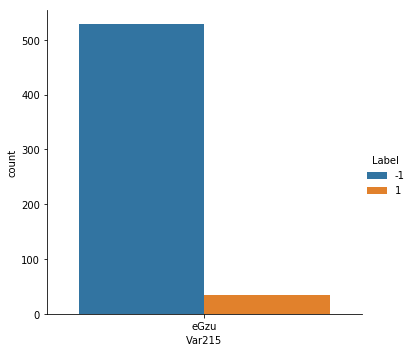

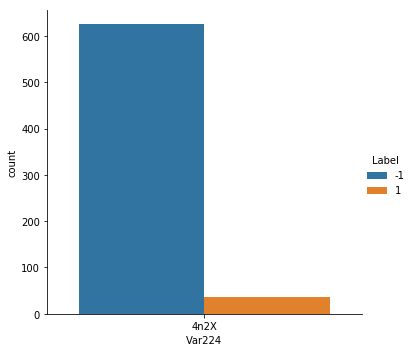

In [54]:
# Категориальные переменные с одной категорией.  
# sns.catplot(x='Var191', y="Label",  data=df_data);
#  ['Var191', 'Var213', 'Var215', 'Var224']
# sns.catplot(x='Var191',  data=df_data, hue="Label", kind="count");

label_show = ['Var191', 'Var213', 'Var215', 'Var224']
for v in label_show:
    sns.catplot(x=v,  data=df_data, hue="Label", kind="count");

# fig, ax = plt.subplots(2,2, figsize=(12,10))
# jitter = [[False, 1], [0.5, 0.2]]

# for j in range(2):
#     for i in range(2):
# #         ax[j][i].tick_params(labelsize=10)
# #         ax[j][i].set_xlabel('label', fontsize=8, position=(.5,20))
# #         ax[j][i].set_ylabel('label', fontsize=8)
#         # x as Hindernisabstand hinzufügen 
#         sns.catplot(x='Var191',  data=df_data, hue="Label", kind="count", ax=ax[j][i]);
# #         sns.stripplot(x="Sex", y="SidestepDist", jitter=jitter[j][i], data=daten_csv, ax=ax[j][i])
# # fig.suptitle('Categorical Features Overview', position=(.5,1.1), fontsize=20)
# fig.tight_layout()

# fig.show()

In [57]:
# sns.catplot(x='Var199',  data=df_data, hue="Label", kind="count");

Error in callback <function flush_figures at 0x000000000B339D90> (for post_execute):


KeyboardInterrupt: 

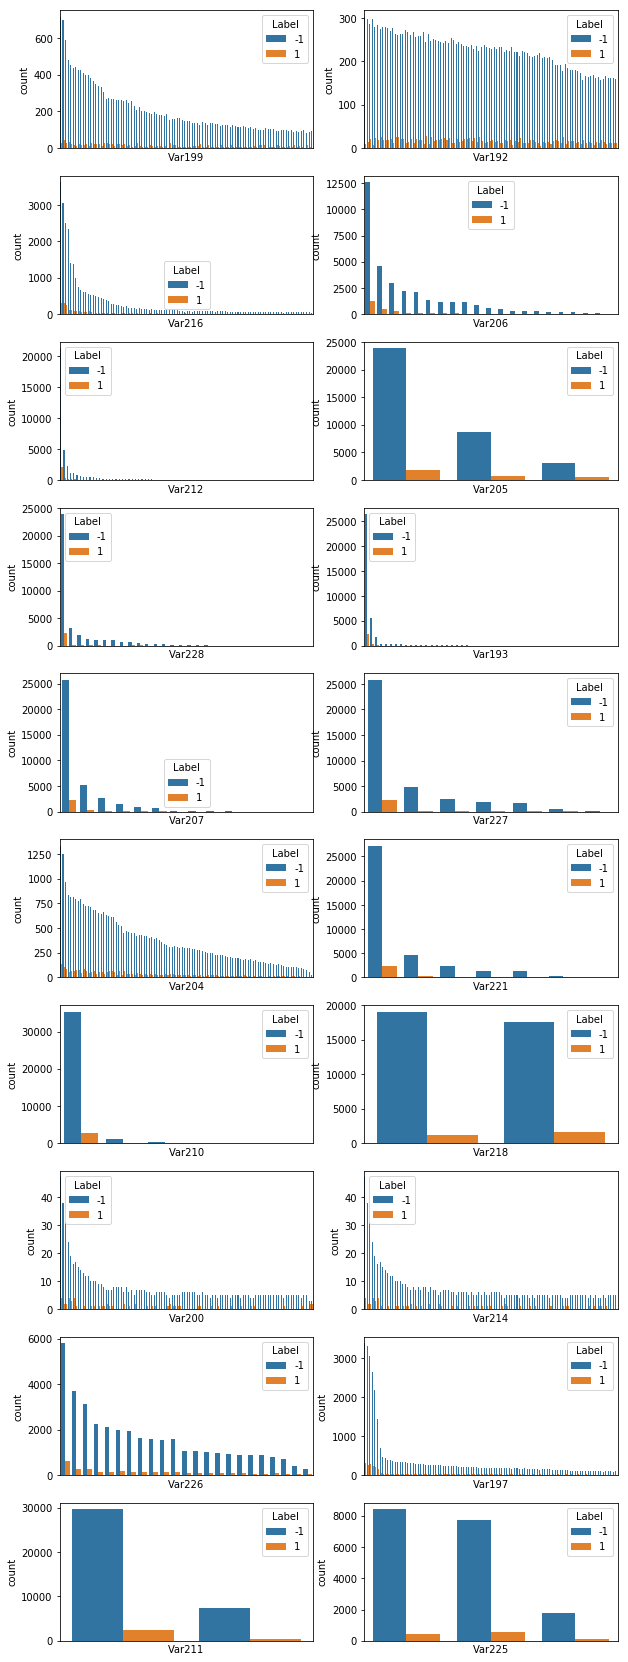

In [172]:
# fig, ax = plt.subplots(figsize=(5, 6))
#fig = plt.figure(figsize=(5,4))
n_par = 20
fig, ax =plt.subplots(n_par // 2,2,  figsize=(10,30))
for i, v in enumerate(df_cat_cor.iloc[:n_par].index):
#     print(i//2, i%2)
    g = sns.catplot(x=v,  data=df_data, hue="Label", kind="count", 
               order=df_data[v].value_counts().iloc[:100].index,  ax=ax[i//2, i%2])
#     height=3, aspect=1.5,
    ax[i//2, i%2].set_xticks([])
    plt.close(g.fig)
#     g.set(xticklabels=[])
#     g.fig.set_size_inches(4,4)
#     g.fig.set_figheight(6)
#     g.fig.set_figwidth(10)

# s = df_data['Var199'].value_counts()
# # s.iloc[:100]
# # s[s > 200].index
# g=sns.catplot(x='Var199',  data=df_data, hue="Label", kind="count", 
#            order=s.iloc[:100].index)
# g.set(xticklabels=[]);


8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

### Дополнения и пояснения

NaN и crosstab
<a id='NaN_crosstab'></a>

In [127]:
df1 = pd.DataFrame(['N/A', 'a', 'a', 'b', 'c', 'c', 'd', 'd', 'd', 'd'], columns = ['A'])
df2 = pd.DataFrame([0, 1, 0, 1, 1, 1, 1, 1, 1, 1], columns = ['B'])
pd.crosstab(df1.A, df2.B)

B,0,1
A,,
N/A,1,0
a,1,1
b,0,1
c,0,2
d,0,4


In [128]:
pd.crosstab(df1.replace('N/A', np.NaN).A, df2.B)

B,0,1
A,,
a,1,1
b,0,1
c,0,2
d,0,4


[Возврат в ячейку, откуда пришли](#NaN_crosstab_return)